# Домашнее задание 3.1. Визуализация данных в Python
# 🏃‍♂️🤸‍♂️🏋️‍♀️ 


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# загружаем данные

workouts = pd.read_csv('workouts.csv', parse_dates=['start_at'])
users = pd.read_excel('users.xlsx', engine='openpyxl')

#сразу создадим новый датафрейм, в котором соединены уроки и пользователи

workouts_users =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')

## Задание 1

**Построй линейный график, который показывает количество тренировок за каждый день. 
Оставь комментарий — какие закономерности ты наблюдаешь.**

Как это сделать:

1. Работать будем с датафремом workouts.
2. Сгруппируй данные по дням, найди количество проведенных тренировок в каждый день и запиши их в переменную trainings_by_day.
3. Построй линейный график. Можешь добавить любые агрументы, но обязательно используй вот эти: 
    - размер графика
    - название графика 
    - подпись оси X 
    - подпись оси Y 
4. Удали неполные данные, которые мешают анализу.

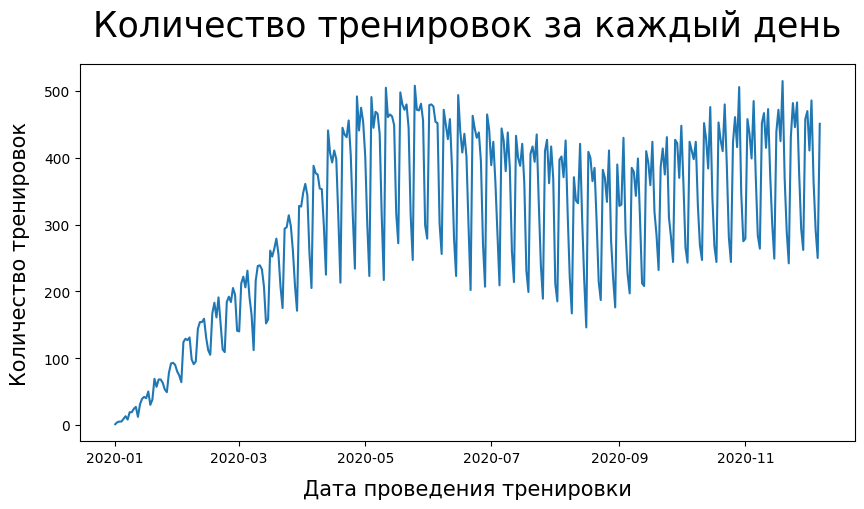

In [3]:
trainings_by_day = workouts.groupby(workouts['start_at'].dt.date)['workout_id'].agg('count')
trainings_by_day = trainings_by_day[:-1]
plt.figure(figsize=(10,5), dpi=100)
plt.plot(trainings_by_day)
plt.xlabel('Дата проведения тренировки', labelpad=10, fontsize=15)
plt.ylabel('Количество тренировок', labelpad=10, fontsize=15)
plt.title('Количество тренировок за каждый день', fontdict={'fontsize': 25}, pad=20)
plt.show()

На графике наблюдается какая-то циклическая закономерность (скорее всего по неделям). Также видим смену восходящего тренда количества тренировок на нисходящий в летний период.

## Задание 2

**Чтобы углубиться в данные, построй bar chart количества тренировок по дням недели (с понедельника по воскресенье) и отобрази горизонтальной линией на графике среднее количество тренировок  в день.**

Как это сделать:
1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделалаи:
    - вернули индекс внутри датафрейма
    - переименовали столбцы, чтобы они соответствовали содержимому
    - добавили столбец с номером дня недели с помощью dt.weekday
    - добавили столбец с названием дня недели с помощью dt.day_name()
    

2. Cгруппируй данные колонки week_day_num по workouts с подсчетом среднего.
3. Построй bar chart. Можешь добавить любые агрументы, но обязательно используй вот эти:

    - размер графика
    - название графика
    - подпись оси X
    - подпись оси Y
    - задай цвет на графике
    

4. Добавь горизонтальную линию со средним количеством тренировок в день.
5. Оставь комментарий, что ты видишь на графике. 

**Подготовим данные**

In [4]:
trainings_by_day # посмотрим, в каком формате лежат нужные данные

start_at
2020-01-01      1
2020-01-02      4
2020-01-03      5
2020-01-04      5
2020-01-05      9
             ... 
2020-12-03    486
2020-12-04    365
2020-12-05    292
2020-12-06    250
2020-12-07    451
Name: workout_id, Length: 342, dtype: int64

In [5]:
trainings_by_day_frame = trainings_by_day.reset_index() # сбросим индекс
trainings_by_day_frame.columns=['workouts_date', 'workouts'] # переименуем столбцы, чтобы названия соответствовали содержимому
trainings_by_day_frame['workouts_date'] = pd.to_datetime(trainings_by_day_frame['workouts_date'])
trainings_by_day_frame['week_day_num'] = trainings_by_day_frame['workouts_date'].dt.weekday # добавим номер дня недели
trainings_by_day_frame['week_day_name'] = trainings_by_day_frame['workouts_date'].dt.day_name() # добавим название дня недели
trainings_by_day_frame

,workouts_date,workouts,week_day_num,week_day_name
0,2020-01-01,1,2,Wednesday
1,2020-01-02,4,3,Thursday
2,2020-01-03,5,4,Friday
3,2020-01-04,5,5,Saturday
4,2020-01-05,9,6,Sunday
...,...,...,...,...
337,2020-12-03,486,3,Thursday
338,2020-12-04,365,4,Friday
339,2020-12-05,292,5,Saturday
340,2020-12-06,250,6,Sunday


Мы видим, что нумерация начинается с 0 до 6. Чтобы дни недели выглядели привычнее, добавим к номеру дня 1.

In [6]:
trainings_by_day_frame['week_day_num'] += 1

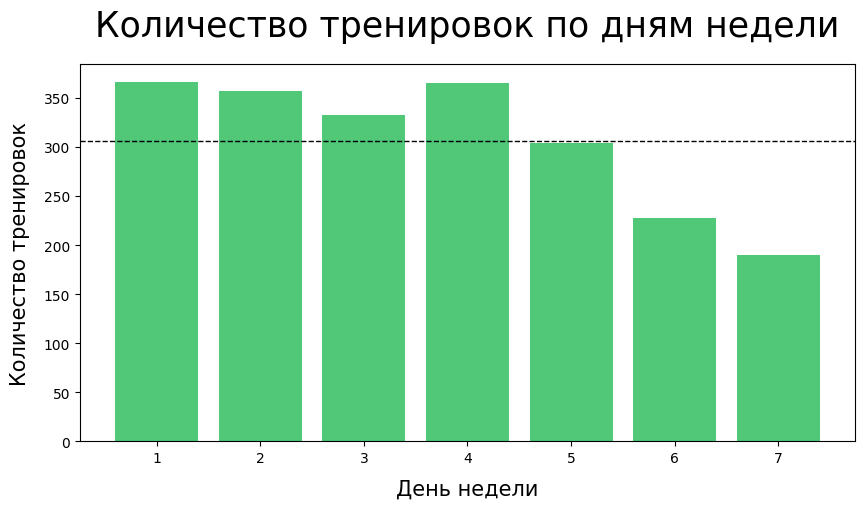

In [7]:
week_day_means = trainings_by_day_frame.groupby('week_day_num')['workouts'].agg('mean')
plt.figure(figsize=(10,5), dpi=100)
plt.bar(week_day_means.index, week_day_means, color='#50c878')
plt.xlabel('День недели', labelpad=10, fontsize=15)
plt.ylabel('Количество тренировок', labelpad=10, fontsize=15)
plt.title('Количество тренировок по дням недели', fontdict={'fontsize': 25}, pad=20)
plt.axhline(trainings_by_day_frame.workouts.mean(), color='k', linestyle='--', linewidth=1)
plt.show()

В выходные количество проводимых тренировок значительно меньше среднего.

## Задание 3

В ноябре постоянные тренеры жаловались на перегрузку. При этом,  в одних департаментах часто не хватало тренеров, а в других люди сидели без работы. 

**Построй гистограмму, которая покажет, как были распределены тренировки за ноябрь по тренерам, которые уже работали в нашей компании до 1 ноября и сделай отдельный график по каждому департаменту (всего их 7).**

Как это сделать:

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - отобрали тренеров, которые уже проводили тренировки до начала ноября
    - взяли тренировки, которые прошли в ноябре
    - выбрали из них те, которые провели ранее отобранные тренеры
    

2. Для каждого департамента: 

    - отфильтруй по trainer_department тренировки нужного департамента
    - построй гистограмму распределения тренеров по количеству проведенных тренировок. Можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси X
        - подпись оси Y
        - задай цвет на графике
        - задай 5 столбцов
        
 

*Весь код можно написать в одной ячейке.*

*Можешь воспользоваться циклом for из раздела Extra занятия.*

**Подготовим данные**


In [8]:
#выбрали тренеров, которые вели тренировки до 1 ноября
trainers_select = workouts['trainer_id'].loc[workouts['start_at'] < '2020-11-01'] 

#множеством взяли уникальные значения
trainers_select = set(trainers_select) 

In [9]:
# взяли тренировки только за ноябрь
november_workouts = workouts.loc[workouts['start_at'].dt.month == 11] 

# берем только активных тренеров
november_workouts = november_workouts.loc[november_workouts['trainer_id'].isin(trainers_select)] 

In [10]:
#кол-во тренировок у каждого тренера
workouts_by_trainer = november_workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 

# превращаем серию в dataframe, сбрасываем индекс
workouts_by_trainer = workouts_by_trainer.reset_index() 

# переименовываем столбец workout_id, ведь в нем теперь количество тренировок
workouts_by_trainer.columns = ['trainer_id','trainer_department','workouts'] 

workouts_by_trainer.head()

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8


In [11]:
# посмотрим, какие у нас есть департаменты
departments = set(workouts_by_trainer['trainer_department'])
departments

{'Athletic',
 'Consultant',
 'Cycling',
 'Dinamo',
 'Sales',
 'Spartacus',
 'Sports Reserves'}

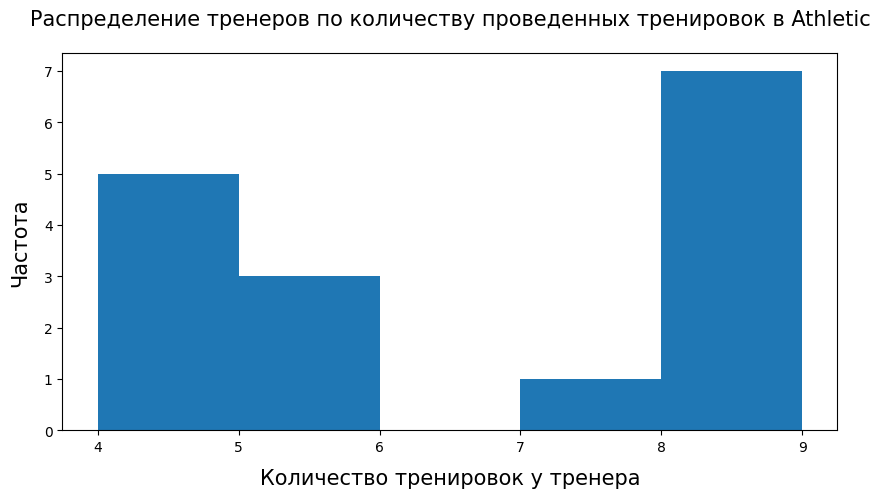

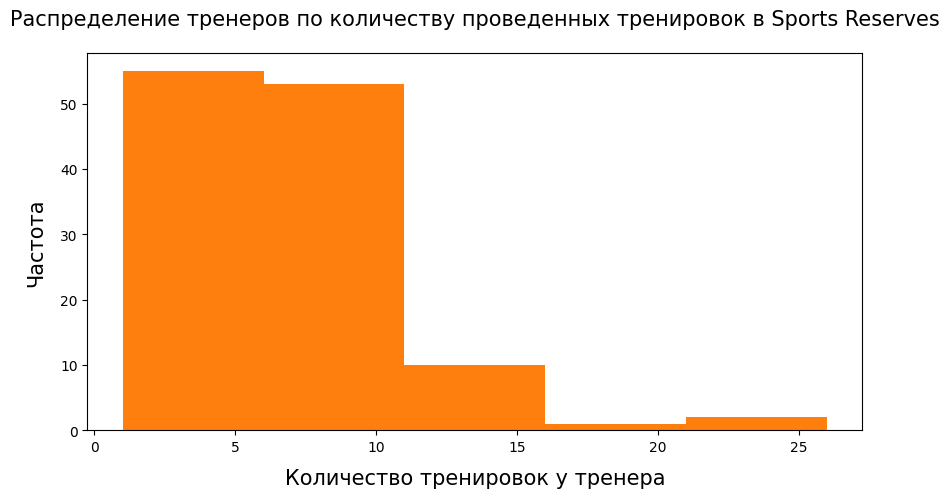

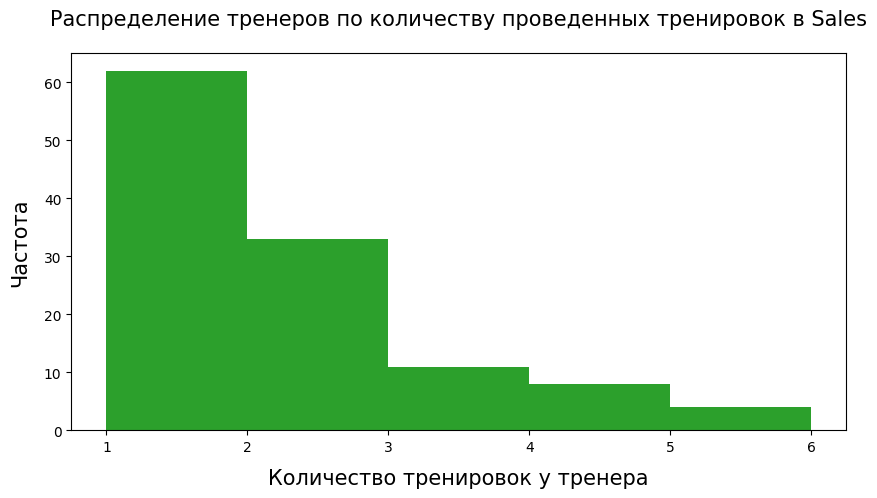

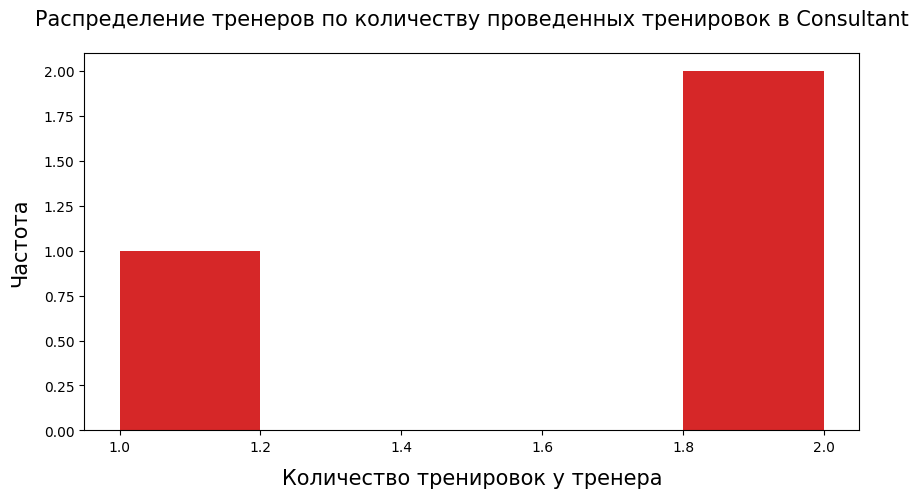

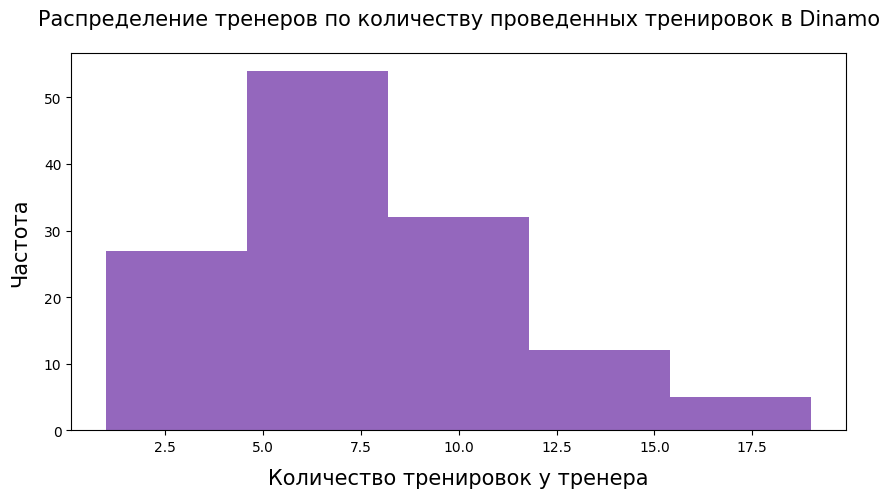

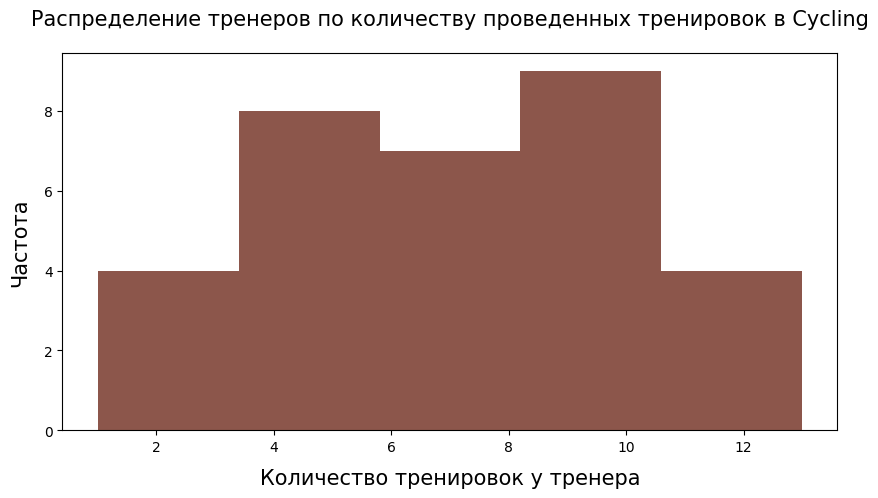

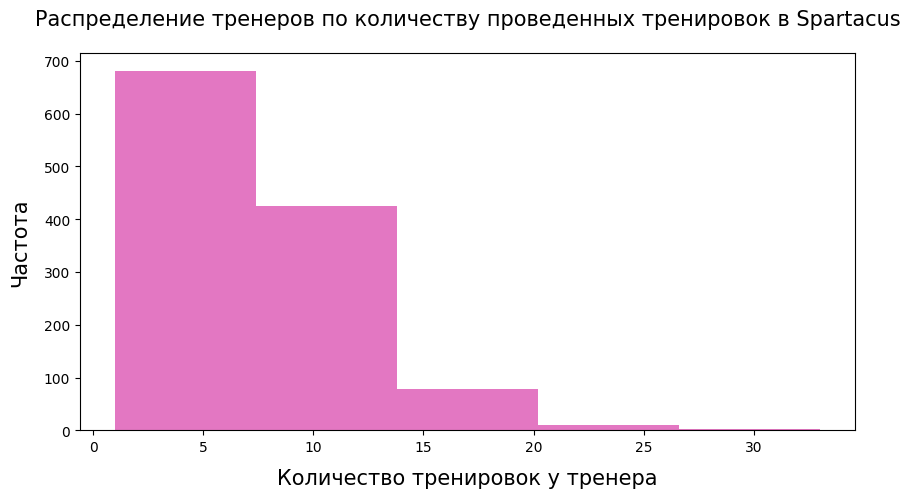

In [12]:
colors = sns.color_palette("tab10")
for i, department in enumerate(departments):
    department_data = workouts_by_trainer[workouts_by_trainer['trainer_department'] == department]
    plt.figure(figsize=(10,5), dpi=100)
    plt.hist(department_data['workouts'], bins=5, color=colors[i])
    plt.xlabel('Количество тренировок у тренера', labelpad=10, fontsize=15)
    plt.ylabel('Частота', labelpad=10, fontsize=15)
    plt.title('Распределение тренеров по количеству проведенных тренировок в ' + department, fontdict={'fontsize': 15}, pad=20)
    plt.show()

## Задание 4

Мы поняли, как тренировки распределились в каждом департаменте, но чтобы принимать какие-то решения, нужно посмотреть общую картину. Здесь нам поможет боксплот: увидим, в каких департаментах низкое среднее количество тренеровок по сравнению с остальными, и где больше перегруженных тренеров.

**Построй boxplot (один) с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам.**

Как это сделать:

1. В аргументы функции, которая строит boxplot, передай: департаменты, общее количество проведенных тренерами занятий и количество тренировок у каждого тренера
2. Используй свой цвет в графике
3. Оставь комментарий: какие рекомендации можно дать по распределению нагрузки на тренеров разных департаментов, глядя на этот график

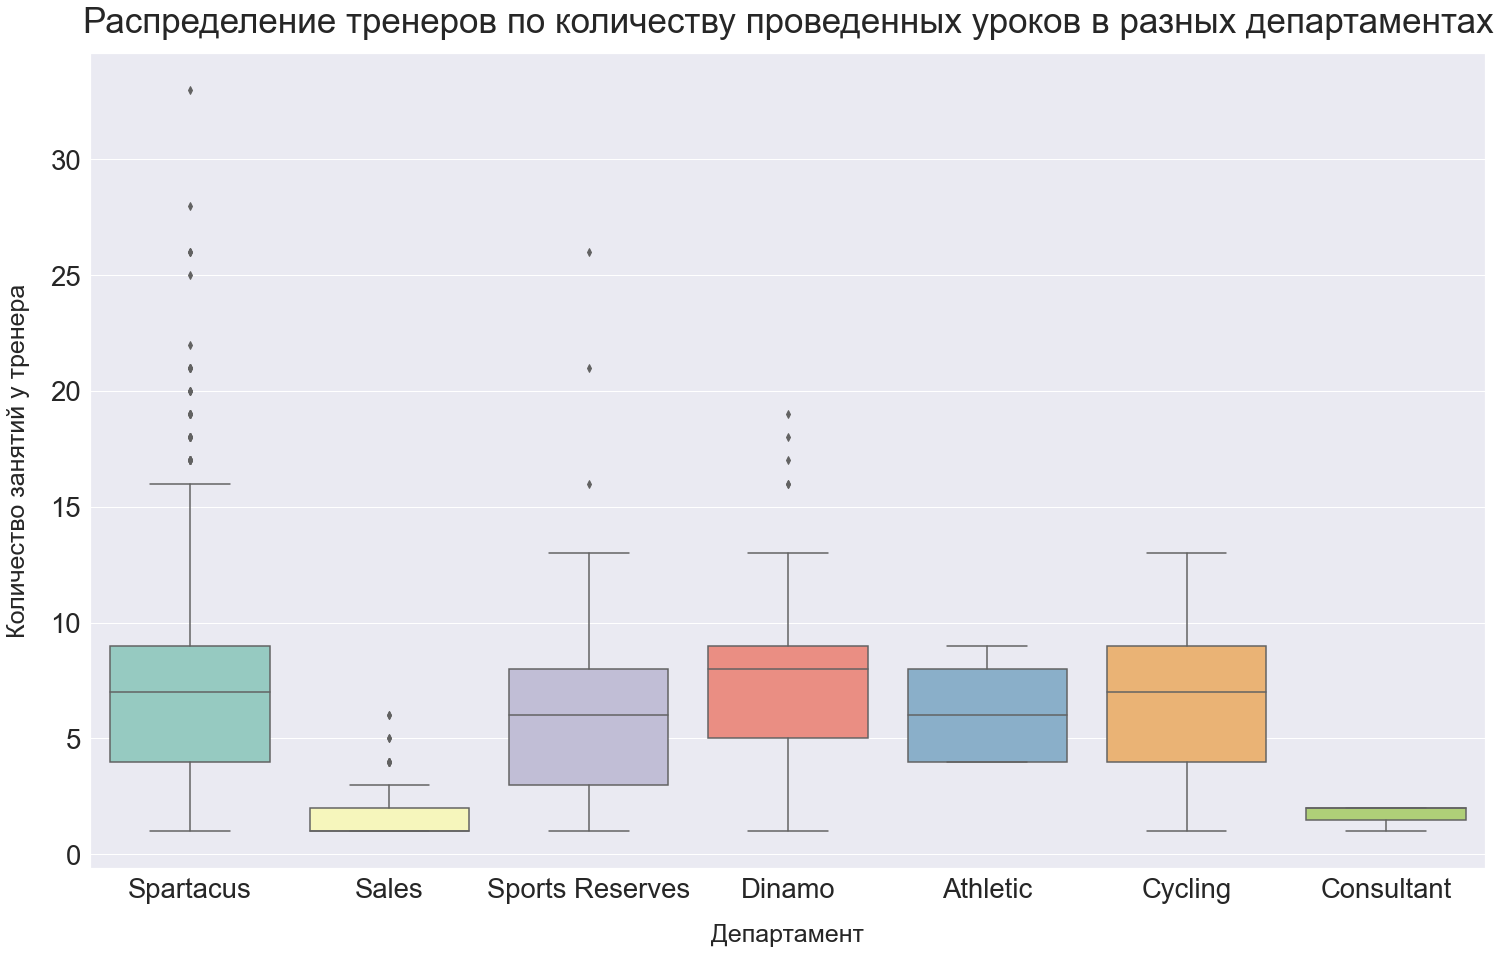

In [13]:
sns.set_style("whitegrid")
sns.set(font_scale=2.5)
ax = sns.boxplot(x='trainer_department', y='workouts', data=workouts_by_trainer,
                 palette='Set3')
ax.set_xlabel('Департамент', labelpad=20, fontsize=25)
ax.set_ylabel('Количество занятий у тренера', labelpad=20, fontsize=25)
ax.set_title('Распределение тренеров по количеству проведенных уроков в разных департаментах',
             fontdict={'fontsize': 35}, pad=20)
ax.figure.set_figwidth(25)
ax.figure.set_figheight(15)

В департаментах Sales и Consultant самая низкая нагрузка у тренеров. В остальных департаментах медиана примерно на одном и том же уровне, но в Spartacus наблюдается много перегруженных тренеров. Возможно стоит часть нагрузки перекинуть на департаменты Sales и Consultant.

## Задание 5


Логично, что дешевые тренировки пропускаю чаще дорогих, но мы хотим сформировать стратегию по снижению количеству пропусков, а значит нам нужны более точные данные. Для начала мы хотим посмотреть детально на корреляцию нескольких параметров с вероятностью пропусков. Возможно, это позволит нам лучше сегментировать нашу аудиторию.

Есть гипотеза, что на вероятность прогула влияет не только цена, но и возраст. Изучи этот вопрос с помощью графиков. 

**Тебе предстоит построить 3 скаттерплота в этом задании, оставь комментарий по каждому графику, видишь ли ты какие-то явные зависимости в даннных.**

1. **Внимательно изучи код, который мы подготовили, и запусти ячейки.** Что мы сделали:
    - отфильтровали только платные тренировки
    - поменяли тип данных в числовых столбцах на int
    - разметили столбец со статусом, успешные тренировки пометили единицей, пропущенные - нулем, чтобы высчитать долю пропусков
    - создали датафрейм, где подсчитана доля прогулов по двум параметрам: возраст и цена


2. **Построй скаттерплот, который покажет корреляцию прогулов к цене**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму cost_age_data_agg, но без возраста, только с ценой
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси X
        - подпись оси Y
        - задай цвет на графике
    
Подготовим данные:

In [14]:
# отфильтровали бесплатные тренировки и сделали копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создаём агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby(['cost','age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

cost_age_data_agg

,cost,age,status
0,500,5,0.000000
1,500,6,0.500000
2,500,7,0.500000
3,500,8,0.242424
4,500,9,0.235294
...,...,...,...
185,1500,47,0.000000
186,1500,49,0.125000
187,1500,50,0.500000
188,1500,55,0.187500


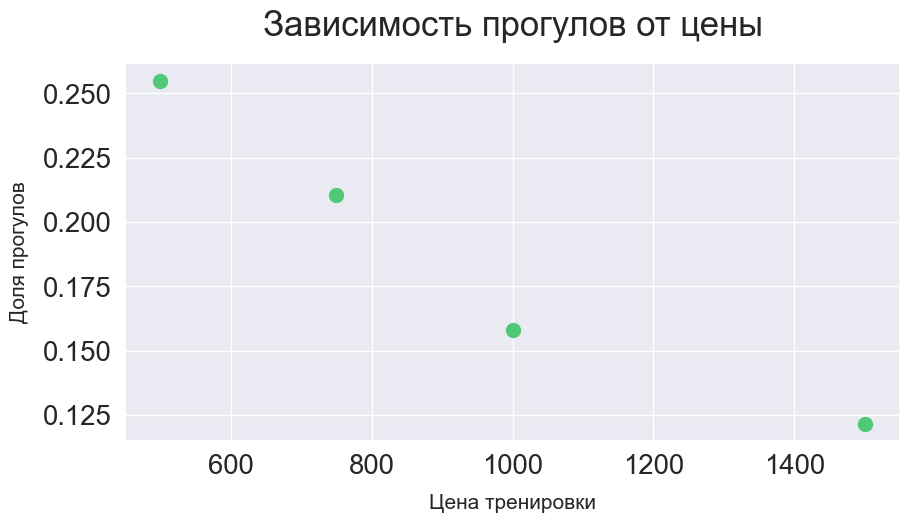

In [15]:
cost_data_agg = cost_age_data.groupby('cost')['status'].mean().reset_index() 
sns.set(font_scale=1.8)
plt.figure(figsize=(10,5), dpi=100)
plt.xlabel('Цена тренировки', labelpad=10, fontsize=15)
plt.ylabel('Доля прогулов', labelpad=10, fontsize=15)
plt.title('Зависимость прогулов от цены', fontdict={'fontsize': 25}, pad=20)
plt.scatter(cost_data_agg['cost'], cost_data_agg['status'], c='#50c878', s=100)
plt.show()

Наблюдается обратная корреляция между ценой тренировки и долей прогулов.

3. **Построй скаттерплот, который покажет корреляцию прогулов к возрасту**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму cost_age_data_agg, но без цен, только с возрастом
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси X
        - подпись оси Y
        - задай цвет на графике

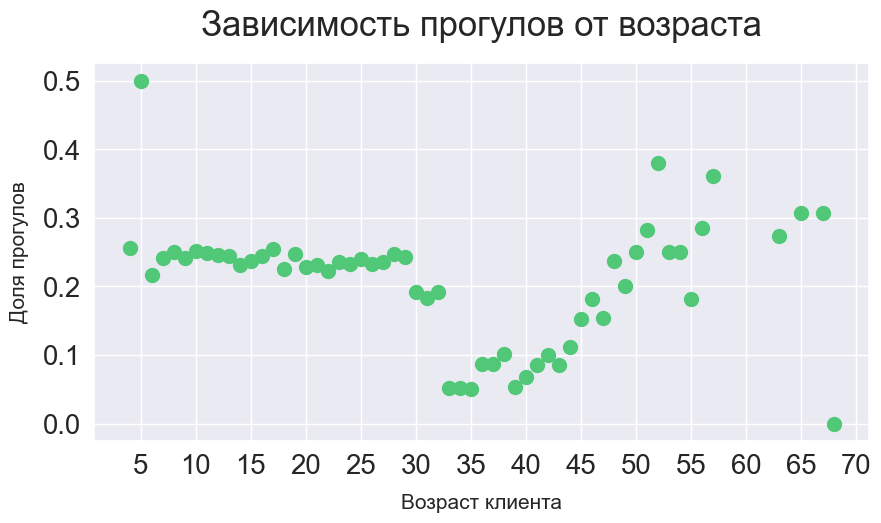

In [16]:
age_data_agg = cost_age_data.groupby('age')['status'].mean().reset_index() 
plt.figure(figsize=(10,5), dpi=100)
plt.xlabel('Возраст клиента', labelpad=10, fontsize=15)
plt.ylabel('Доля прогулов', labelpad=10, fontsize=15)
plt.title('Зависимость прогулов от возраста', fontdict={'fontsize': 25}, pad=20)
plt.xticks(ticks=np.arange(5, 80, step=5))
plt.scatter(age_data_agg['age'], age_data_agg['status'], c='#50c878', s=100)
plt.show()

Явной корреляции нет, но у людей в возрасте 35-45 доля прогулов меньше, чем у остальных

4. **Построй скаттерплот, который покажет корреляцию прогулов и к возрасту и к цене одновременно**
    - создай словарь цветов цен в переменной price_color. Чтобы увидеть все уникальные значения, можно использовать множества
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси X
        - подпись оси Y
        - аргумент  с - цвета для разных цен
          

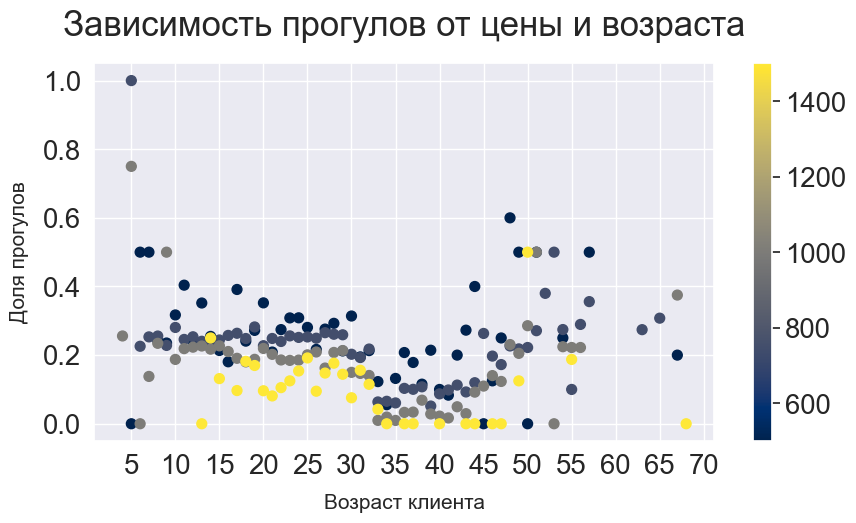

In [17]:
plt.figure(figsize=(10,5), dpi=100)
plt.xlabel('Возраст клиента', labelpad=10, fontsize=15)
plt.ylabel('Доля прогулов', labelpad=10, fontsize=15)
plt.title('Зависимость прогулов от цены и возраста', fontdict={'fontsize': 25}, pad=20)
plt.xticks(ticks=np.arange(5, 80, step=5))
ax = plt.scatter(cost_age_data_agg['age'], cost_age_data_agg['status'],
            c=cost_age_data_agg['cost'], s=50, cmap='cividis')
plt.colorbar()
plt.show()

Мы можем выделить сегмент клиентов от 30-45 лет как самый непрогуливающий, причем чем больше стоит тренировка, тем прогулов еще меньше.

## Задание 6

**Сделай heatmаp для кейса из задания 5.** 

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - написали функцию, которая в зависимости от возраста возвращает возрастную группу
    - создали новый столбец, применив функцию к столбцу возраста
    - сгруппировали данные, чтобы для каждой пары возраст-цена была сгруппирована средняя вероятность прогула
    
    
2. Создай сводную таблицу (матрицу), в которой строками будут интервалы возраста, столбцами — цена занятия, значением — доля прогулов.
3. Построй хитмап. Используй любые аргументы, но обязательно вот эти:
    - размер графика
    - название графика
    - подпись оси X
    - подпись оси Y
    - вывод значений в ячейках
    
4. Оставь комментарий: какие закономерности ты видишь на графике.

In [18]:
# пишем функцию, которая поможет разбить клиентов на возрастные группы

def calculate_age_bins(age):
    if age <= 20:
        return '0-20'
    if age <= 25:
        return '21-25'
    if age <= 30:
        return '26-30'
    if age <= 35:
        return '31-35'
    if age <= 40:
        return '36-40'
    if age <= 45:
        return '41-45'
    if age <= 50:
        return '46-50'
    return '50+'

In [19]:
#кладем в новый столбец возрастную группу
cost_age_data['age_bin'] = cost_age_data.age.apply(calculate_age_bins)

# создаём агрегированный набор данных
cost_age_data_agg = cost_age_data.groupby(['cost','age_bin'])['status'].mean().reset_index()
cost_age_data_agg

,cost,age_bin,status
0,500,0-20,0.286578
1,500,21-25,0.283505
2,500,26-30,0.255597
3,500,31-35,0.165217
4,500,36-40,0.175573
5,500,41-45,0.191489
6,500,46-50,0.285714
7,500,50+,0.307692
8,750,0-20,0.249445
9,750,21-25,0.250124


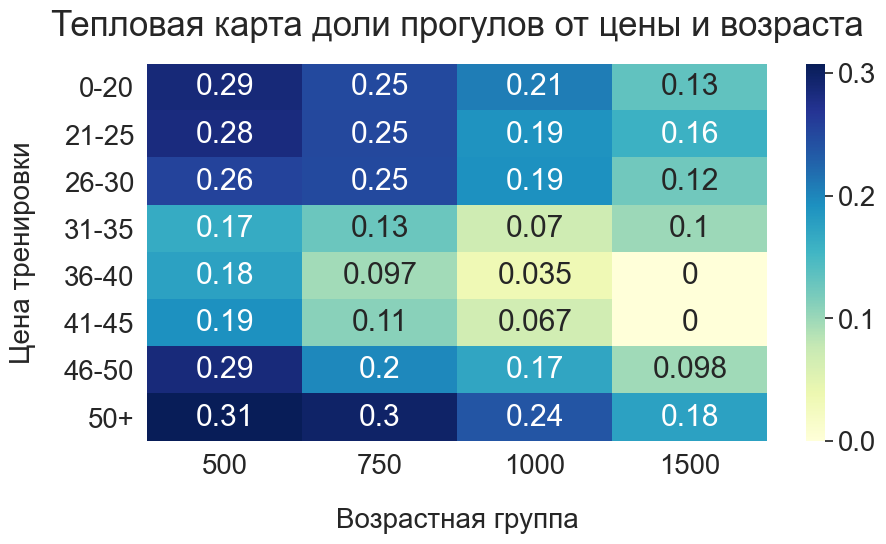

In [20]:
pivot_table = cost_age_data_agg.pivot(index='age_bin', columns='cost', values='status')
plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.xlabel('Возрастная группа', labelpad=20, fontsize=20)
plt.ylabel('Цена тренировки', labelpad=20, fontsize=20)
plt.title('Тепловая карта доли прогулов от цены и возраста', fontdict={'fontsize': 25}, pad=20)
plt.show()

####  Какие выводы мы можем сделать по последним графикам:
- Чем больше стоимость занятия, тем меньше прогулов.
- Лучше остальных занятия посещают клиенты в возрасте от 31 до 45 лет.
- Если мы хотим добиться максимальной посещаемости, то целевой группой для нас будут клиенты возрастом от 31 до 45 лет с ценой тренировки от 1000 рублей.

# 🎉🎉🎉 Поздравляем, ты великолепен! 